In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('Mall_Customers.csv')

df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
#1. zrób one-hot encoding na kolumnie Genere
#2. dodaj do df nową kolumnę "is_male"
#3. usuń niepotrzebne kolumny z df

In [6]:
#1
temp = pd.get_dummies(df.Genre, prefix = 'is')
temp

,is_Female,is_Male
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
195,1,0
196,1,0
197,0,1
198,0,1


In [7]:
#2
df['is male'] = temp['is_Male']

df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),is male
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,1


In [8]:
#3
df = df.drop(['Genre','CustomerID'], axis = 1)

df

,Age,Annual Income (k$),Spending Score (1-100),is male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


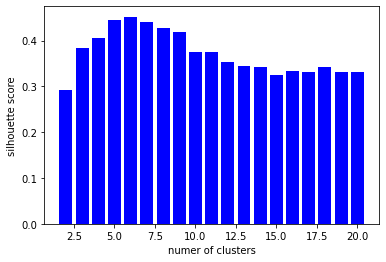

In [9]:
# sprawdzenie silhouette_score dla różnej liczby klastrów

from sklearn.metrics import silhouette_score

def get_kmeans_score(data, k):
    kmeans = KMeans(n_clusters=k)
    model = kmeans.fit(data)
    return silhouette_score(data, model.labels_, metric='euclidean')

results = []
k_list = list(range(2,21))

for k in k_list:
    results.append(get_kmeans_score(df, k))

plt.bar(k_list, results, color='b')
plt.xlabel('numer of clusters')
plt.ylabel('silhouette score')
plt.show()

In [10]:
df

,Age,Annual Income (k$),Spending Score (1-100),is male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


Text(0.5, 0, 'Spending Score')

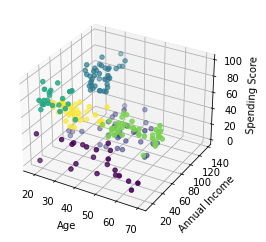

In [11]:
#wyświetl wykres 3D dla wybranej (wyznaczonej) liczby klastrów


kmeans = KMeans(n_clusters=6) 
model = kmeans.fit(df) 
labels = model.predict(df) 

#%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df["Age"], df["Annual Income (k$)"], df["Spending Score (1-100)"], c=labels)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')

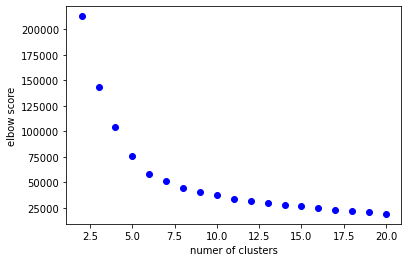

In [18]:
#Teraz policz to samo dla metody łokciowej. 
#Funkcja wygląda tak samo, poza jedną różnicą: return abs(model.score(data)) 

from sklearn.metrics import silhouette_score

def get_kmeans_score(data, k):
    kmeans = KMeans(n_clusters=k)
    model = kmeans.fit(data)
    return abs(model.score(data))

results = []
k_list = list(range(2,21))

for k in k_list:
    results.append(get_kmeans_score(df, k))

plt.plot(k_list, results,'o', color='b')
plt.xlabel('numer of clusters')
plt.ylabel('elbow score')
plt.show()

metoda łokciowa - klaster powinien miec punkty blisko siebie, więc suma wartości odległości punktami w klastrze powinna być jak najmniejsza 
w pewnym momencie kolejne zmiany liczby klastrów są dużo mniejsze - i ta ilość, od której wartości przestają się zmieniać to właśnie najlepsza liczba klastrów

In [13]:
#wyświetl wykres 3D dla wybranej (wyznaczonej) liczby klastrów

Text(0.5, 0, 'Spending Score')

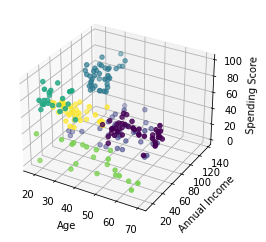

In [14]:
kmeans = KMeans(n_clusters=6) 
model = kmeans.fit(df) 
labels = model.predict(df) 

#%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df["Age"], df["Annual Income (k$)"], df["Spending Score (1-100)"], c=labels)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')